# <font color='CadetBlue'> **ПРАКТИКУМ ПО ПРОГРАММИРОВАНИЮ (1 курс)**

## <font color='CadetBlue'> **ВТОРОЙ СЕМЕСТР**

### <font color='CadetBlue'> **II** —  апрель, май

#### <font color='LightCoral'> **ЗАДАНИЕ 2.** Реализация пакета модулей для манипулирования плоскими фигурами.

Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: `((0,0), (0,1), (1,1), (1,0))` — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля `itertools` и `functools`.

Суммарная сложность дополнительных заданий должна быть не менее 5.

1.	Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки `matplotlib`, см. пример: [ссылка](https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py)).

<font color="Crimson">**обязательная часть**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import math
import random
import numpy as np
np.set_printoptions(suppress=True)
import copy
import functools

In [3]:
def visual(pt: iter, color=None):
    fig, ax = plt.subplots()
    for a in pt:
        if color is not None:
            a.set_color(color)
        a_ = copy.copy(a)
        ax.add_patch(a_)
    ax.set_xlim([-20, 20]) #сделать правильное определение границ
    ax.set_ylim([-20, 20])
    ax.grid()
    plt.show()

2.	Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

* прямоугольников (`gen_rectangle`);

* треугольников (`gen_triangle`);

* правильных шестиугольников (`gen_hexagon`).

* с помощью данных функций используя функции из модуля `itertools` сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

<font color="Crimson">**обязательная часть**


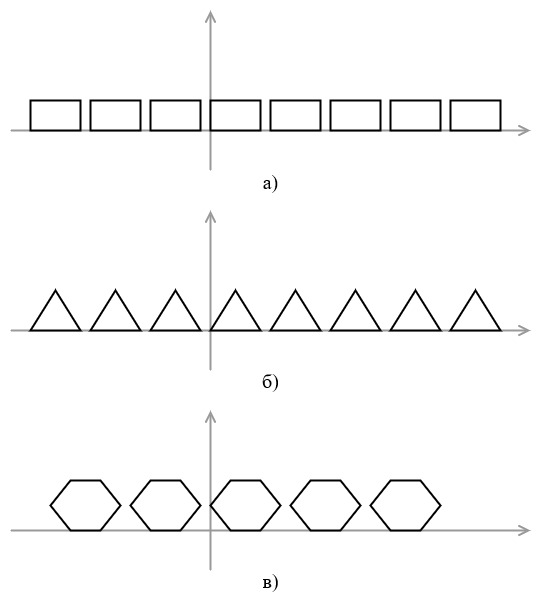

Рисунок 2 — Последовательности непересекающихся полигонов

In [5]:
def gen_rectangle(w, h, s):
    startx = 0
    width, height = w, h
    counter = 0
    while True:
        if counter == 0:
            p = Polygon([[0, 0], [width, 0],
                         [width, height], [0, height]])
            startx += s
        else:
            if counter % 2 == 1:
                p = Polygon([[startx, 0], [startx+width, 0],
                            [startx+width, height], [startx, height]])
                startx *= -1
            else:
                p = Polygon([[startx, 0], [startx+width, 0],
                            [startx+width, height], [startx, height]])
                startx *= -1
                startx += s
        counter += 1
        yield p

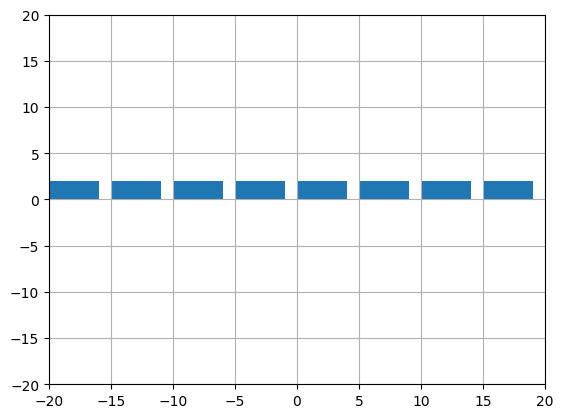

In [6]:
rec = gen_rectangle(4, 2, 5)
recs = [next(rec) for _ in range(10)]
visual(recs)

In [7]:
def rotate(p_old, angle, center):
    x_c, y_c = center
    x_old, y_old = p_old
    x_old -= x_c
    y_old -= y_c
    x_new = x_old * math.cos(angle) - y_old * math.sin(angle)
    y_new = x_old * math.sin(angle) + y_old * math.cos(angle)
    return (x_new+x_c, y_new+y_c)

In [8]:
def gen_triangle(l, s):
    startx = 0
    length = l
    counter = 0
    while True:
        if counter == 0:
            p = Polygon([[0, 0], [length, 0], rotate([length, 0], math.pi/3, [0, 0])])
            startx += s
        else:
            if counter % 2 == 1:
                p = Polygon([[startx, 0], [startx+length, 0], rotate([startx+length, 0], math.pi/3, [startx, 0])])
                startx *= -1
            else:
                p = Polygon([[startx, 0], [startx+length, 0], rotate([startx+length, 0], math.pi/3, [startx, 0])])
                startx *= -1
                startx += s
        counter += 1
        yield p

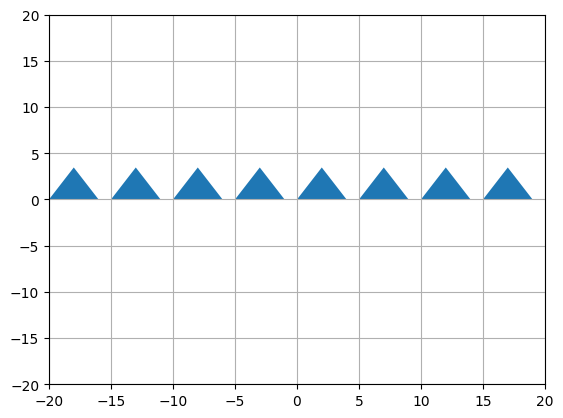

In [9]:
triang = gen_triangle(4, 5)
triangs = [next(triang) for _ in range(10)]
visual(triangs)

In [10]:
def gen_hexagon(l, s):
    startx = 0
    length = l
    counter = 0
    while True:
        if counter == 0:
            points = [[0 + length*i, 0] for i in range(6)]
            for j in range(5):
                for i in range(5, j, -1):
                    points[i] = rotate(points[i], math.pi/3, points[j])
            p = Polygon(points)
            startx += s
        else:
            if counter % 2 == 1:
                points = [[startx + length*i, 0] for i in range(6)]
                for j in range(5):
                    for i in range(5, j, -1):
                        points[i] = rotate(points[i], math.pi/3, points[j])
                p = Polygon(points)
                startx *= -1
            else:
                points = [[startx + length*i, 0] for i in range(6)]
                for j in range(5):
                    for i in range(5, j, -1):
                        points[i] = rotate(points[i], math.pi/3, points[j])
                p = Polygon(points)
                startx *= -1
                startx += s
        counter += 1
        yield p

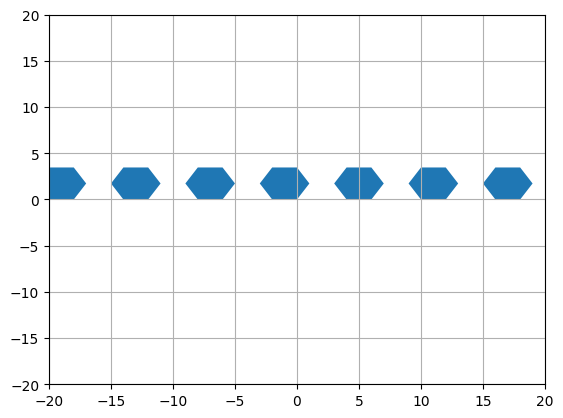

In [11]:
hex = gen_hexagon(2, 6)
hexs = [next(hex) for _ in range(10)]
visual(hexs)

3.	Реализовать операции:

* параллельный перенос (`tr_translate`);

* поворот (`tr_rotate`);

* симметрия (`tr_symmetry`);

* гомотетия (`tr_homothety`);

которые можно применить к последовательности полигонов с помощью функции `map`.

<font color="Crimson">**обязательная часть**


In [12]:
def tr_translate(polygon, x_s, y_s):
    points = polygon.xy
    res = []
    for i in range(len(points)):
        t = [points[i][0] + x_s, points[i][1] + y_s]
        res.append(t)
    return Polygon(res[:-1])

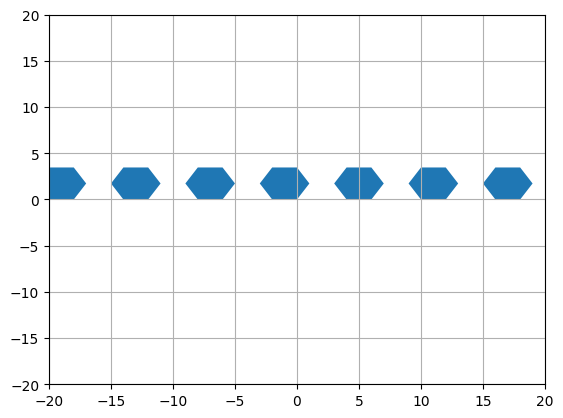

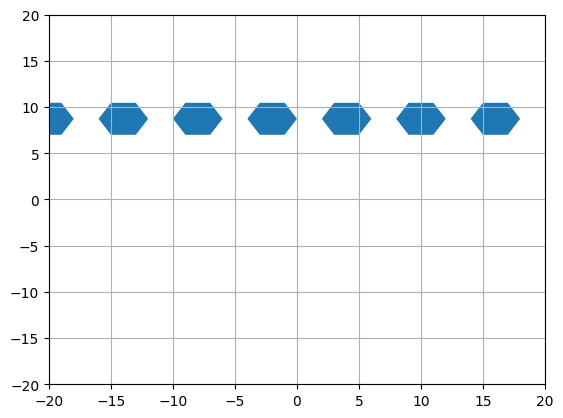

In [13]:
hex = gen_hexagon(2, 6)
hexs = [next(hex) for _ in range(10)]
hexs2 = []
for a in hexs:
    hexs2.append(tr_translate(a, 5, 7))
visual(hexs)
visual(hexs2)

In [14]:
def tr_rotate(polygon, angle):
    res = []
    points = polygon.xy
    for i in range(len(points)):
        nx = points[i][0] * math.cos(angle) - points[i][1] * math.sin(angle)
        ny = points[i][0] * math.sin(angle) + points[i][1] * math.cos(angle)
        t = [nx, ny]
        res.append(t)
    return Polygon(res[:-1])

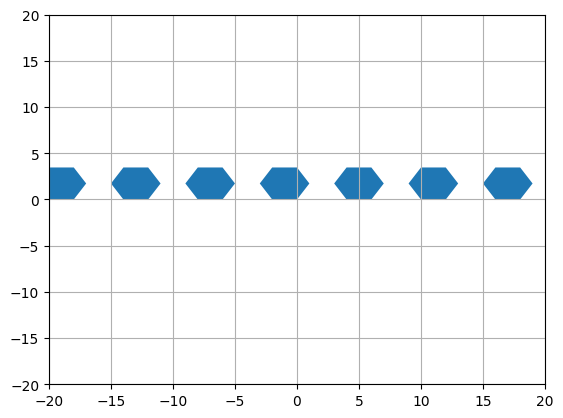

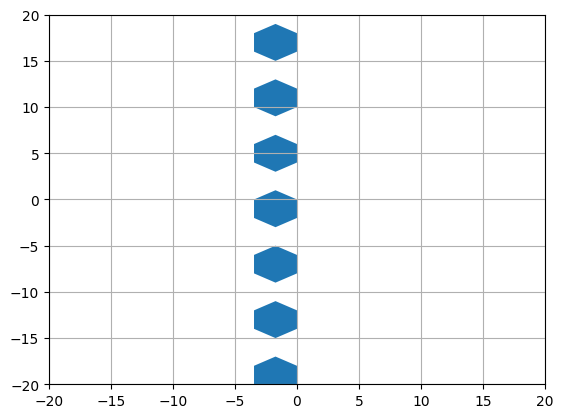

In [15]:
hex = gen_hexagon(2, 6)
hexs = [next(hex) for _ in range(10)]
hexs2 = []
for a in hexs:
    hexs2.append(tr_rotate(a, math.pi/2))
visual(hexs)
visual(hexs2)

In [16]:
def tr_symmetry(polygon, axis):
    points = polygon.xy
    res = []
    if axis == 'y':
        for i in range(len(points)):
            t = [points[i][0]*(-1), points[i][1]]
            res.append(t)
    if axis == 'x':
        for i in range(len(points)):
            t = [points[i][0], points[i][1]*(-1)]
            res.append(t)
    return Polygon(res[:-1])

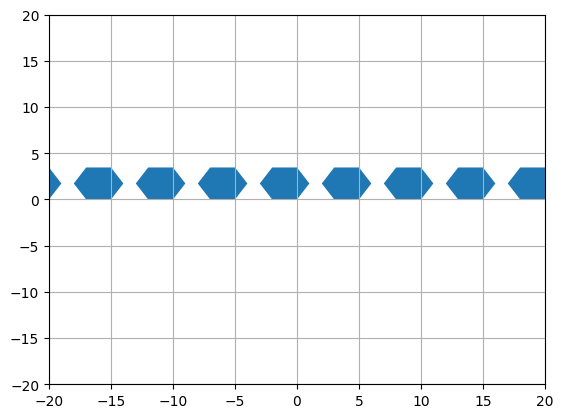

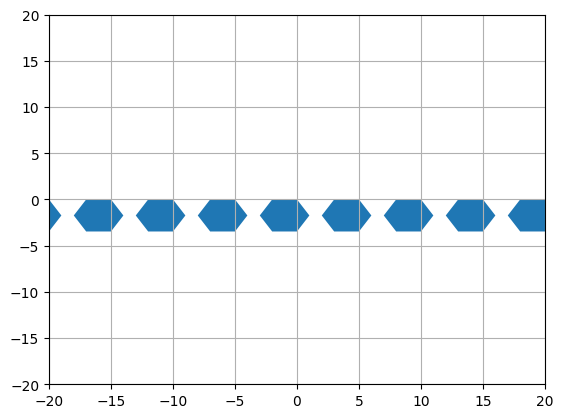

In [17]:
hex = gen_hexagon(2, 5)
hexs = [next(hex) for _ in range(10)]
hexs2 = []
for a in hexs:
    hexs2.append(tr_symmetry(a, 'x'))
visual(hexs)
visual(hexs2)

In [18]:
def tr_homothety(polygon, coef):
    res = []
    points = polygon.xy
    for i in range(len(points)):
        t = [points[i][0] * coef, points[i][1] * coef]
        res.append(t)
    return Polygon(res[:-1])

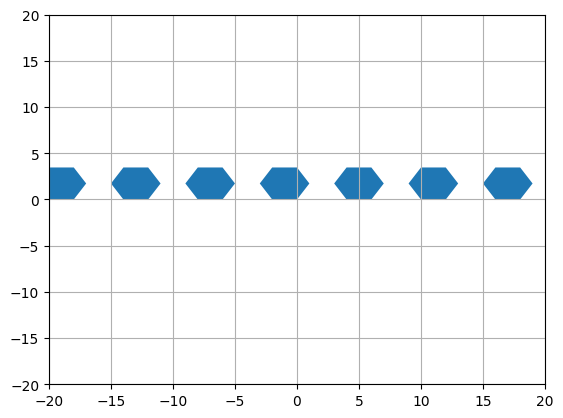

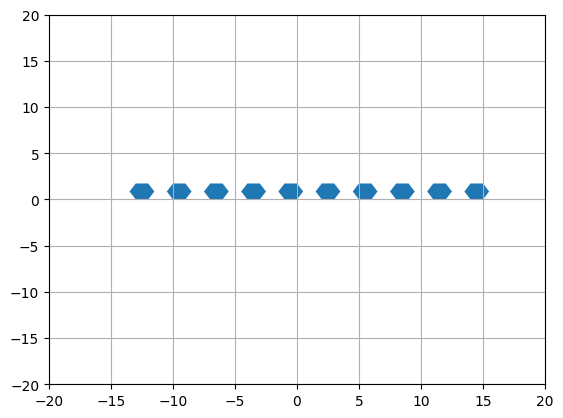

In [19]:
hex = gen_hexagon(2, 6)
hexs = [next(hex) for _ in range(10)]
hexs2 = []
for a in hexs:
    hexs2.append(tr_homothety(a, 0.5))
visual(hexs)
visual(hexs2)

4.	С помощью данных функций создать и визуализировать (рис. 3):

* три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

* две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

* две параллельных ленты треугольников, ориентированных симметрично друг к другу;

* последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

<font color="Crimson">**обязательная часть**

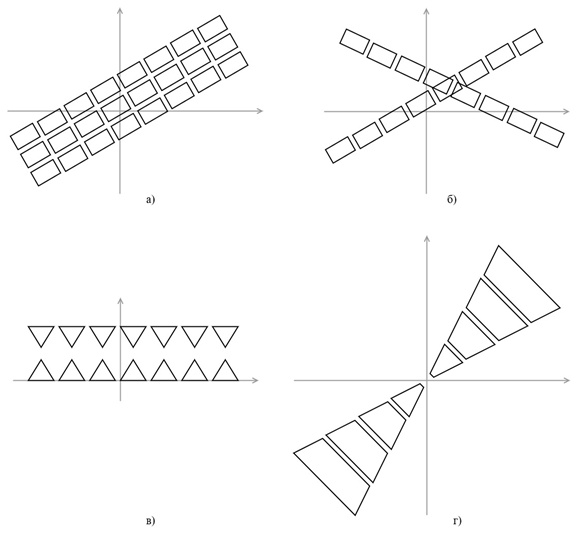

Рисунок 3 — Реализация операции параллельного переноса (а), поворота (б),
симметрии (в) и гомотетии (г)

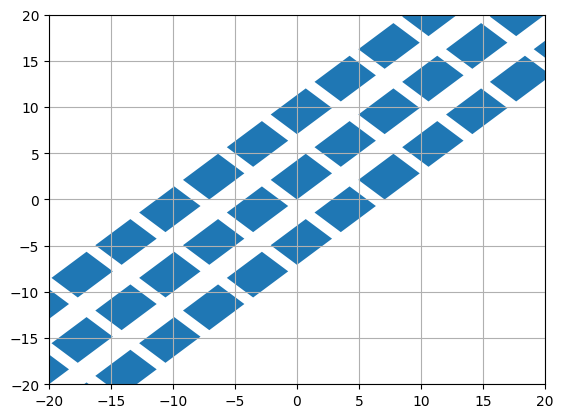

In [23]:
n = 15
rect1 = gen_rectangle(4, 3, 5)
rects_mid = [next(rect1) for _ in range(n)]
rects_down = map(tr_translate, rects_mid, [0 for _ in range(n)], [-5 for _ in range(n)])
rects_up = map(tr_translate, rects_mid, [0 for _ in range(n)], [5 for _ in range(n)])

rects_mid = map(tr_rotate, rects_mid, [math.pi/4 for _ in range(n)])
rects_down = map(tr_rotate, rects_down, [math.pi/4 for _ in range(n)])
rects_up = map(tr_rotate, rects_up, [math.pi/4 for _ in range(n)])

rects = iter(list(rects_up) + list(rects_mid) + list(rects_down))

visual(rects)

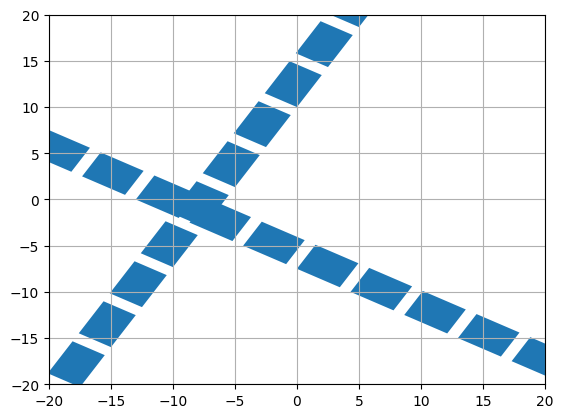

In [24]:
n = 20
rect1 = gen_rectangle(4, 3, 5)
rects = [next(rect1) for _ in range(n)]
rects_down = map(tr_rotate, rects, [math.pi/3 for _ in range(n)])
rects_up = map(tr_rotate, rects, [-math.pi/6 for _ in range(n)])
rects_down = map(tr_translate, rects_down, [0 for _ in range(n)], [10 for _ in range(n)])
rects_up = map(tr_translate, rects_up, [-13 for _ in range(n)], [0 for _ in range(n)])

rects = iter(list(rects_down) + list(rects_up))
visual(rects)

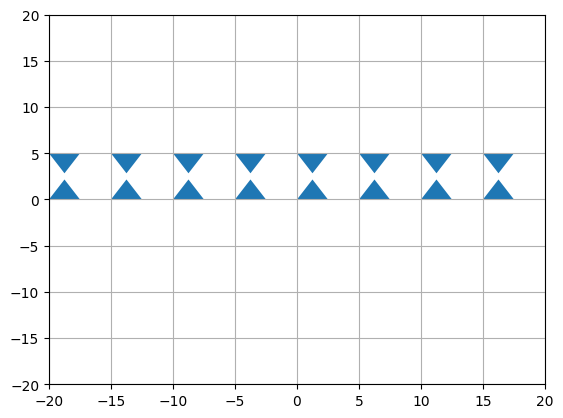

In [25]:
n = 15
trig = gen_triangle(2.5, 5)
trigs_down = [next(trig) for _ in range(n)]
trigs_up = map(tr_symmetry, trigs_down, ['x' for _ in range(n)])
trigs_up = map(tr_translate, trigs_up, [0 for _ in range(n)], [5 for _ in range(n)])

trigs = iter(list(trigs_down) + list(trigs_up))
visual(trigs)

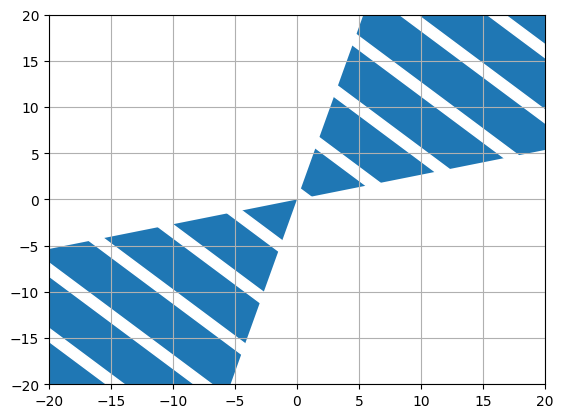

In [39]:
trig1 = next(gen_triangle(55, 0))
trig2 = next(gen_triangle(55, 0))

trig1 = tr_rotate(trig1, math.pi/12)
trig2 = tr_rotate(trig2, math.pi+math.pi/12)

rec = gen_rectangle(1, 100, 5)
recs = [next(rec) for _ in range(15)]
recs = [tr_translate(a, 0, -50) for a in recs]
recs = [tr_rotate(a, math.pi/4) for a in recs]
for a in recs:
    a.set_color('white')
visual([trig1, trig2]+recs)

5.	Реализовать операции:
* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

<font color="Crimson">**обязательная часть: 2 пункта<br>4 пункта — сложность 1<br>6 пунктов — сложность 2**


In [55]:
def flt_convex_polygon(polygon):
    points = polygon.xy
    n = len(points)
    if n < 3:
        return False
    prev_cross = 0
    for i in range(n):
        p0 = points[i]
        p1 = points[(i + 1) % n]
        p2 = points[(i + 2) % n]
        dx1 = p1[0] - p0[0]
        dy1 = p1[1] - p0[1]
        dx2 = p2[0] - p1[0]
        dy2 = p2[1] - p1[1]
        cross = dx1 * dy2 - dy1 * dx2
        if cross == 0:
            continue
        if prev_cross == 0:
            prev_cross = cross
        else:
            if (cross > 0) != (prev_cross > 0):
                return False
    return True

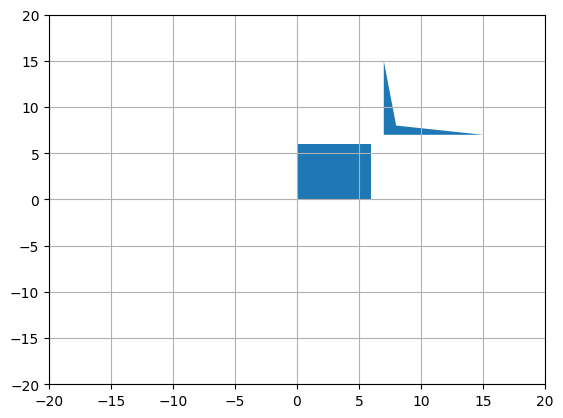

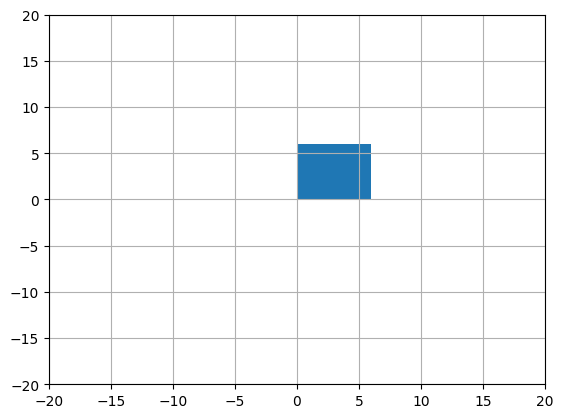

In [56]:
p1 = Polygon([[0, 0], [0, 6], [6, 6], [6, 0]])
p2 = Polygon([[7, 7], [7, 15], [8, 8], [15, 7]])

visual([p1, p2])
res = filter(flt_convex_polygon, [p1, p2])
visual(res)

In [43]:
def flt_square(polygon, area):
    s = 0
    points = polygon.xy
    n = len(points)
    for i in range(len(points)-1):
        s += (points[i][0]*points[i+1][1])
    s += points[n-1][0]*points[0][1]
    for i in range(len(points)-1):
        s -= (points[i+1][0]*points[i][1])
    s -= points[0][0] * points[n-1][1]
    s = abs(s)/2
    return s < area

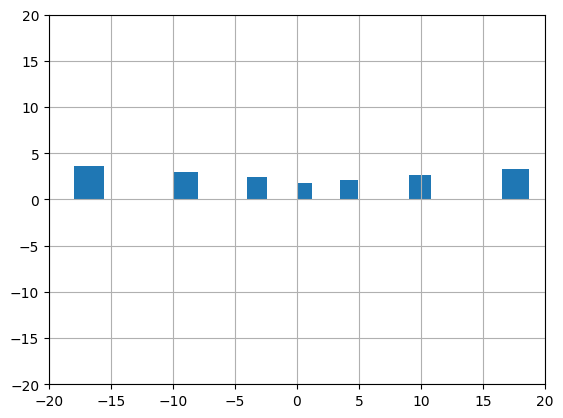

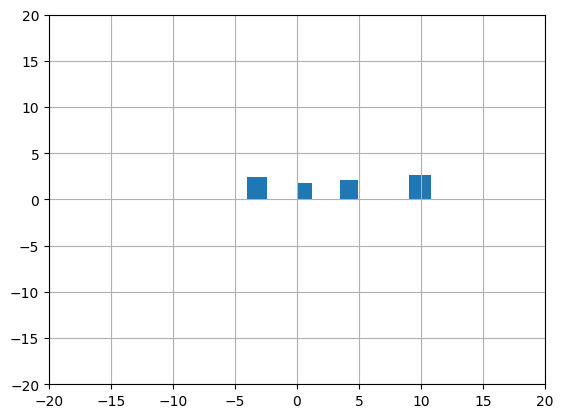

In [61]:
rec = gen_rectangle(2, 3, 5)
recs = [next(rec) for _ in range(10)]
coefs = [0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
recs2 = []
for i in range(10):
    recs2.append(tr_homothety(recs[i], coefs[i]))
visual(recs2)
recs3 = filter(lambda x: flt_square(x, 6), recs2) # 6 - площадь
visual(recs3) # только у этих прямоугольников площадь меньше 6

In [62]:
def flt_short_side(polygon, length):
    points = polygon.xy
    n = len(points)
    lengths = []
    for i in range(n-1):
        # находим расстояние между i и i+1 точкой
        lengths.append(math.sqrt(pow(points[i][0]-points[i+1][0], 2) + pow(points[i][1]-points[i+1][1], 2)))
    return min(lengths) < length

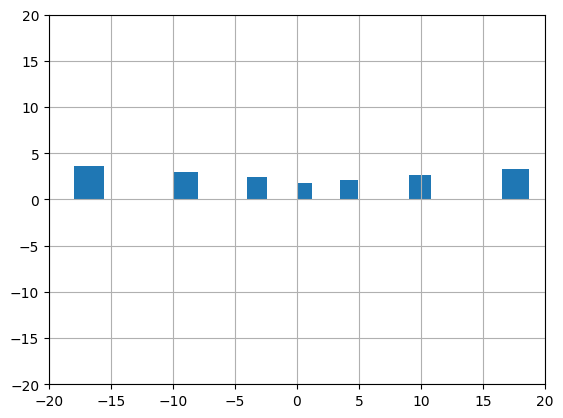

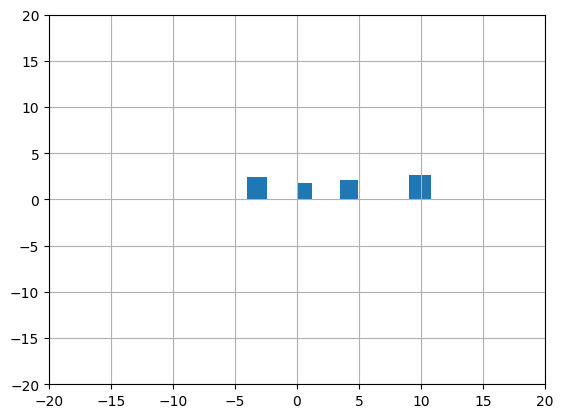

In [64]:
rec = gen_rectangle(2, 3, 5)
recs = [next(rec) for _ in range(10)]
coefs = [0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
recs2 = []
for i in range(10):
    recs2.append(tr_homothety(recs[i], coefs[i]))
visual(recs2)
recs3 = filter(lambda x: flt_short_side(x, 2), recs2) # 4 - длина стороны
visual(recs3) # только у этих прямоугольников есть сторона меньше 4

In [69]:
def flt_point_inside(polygon, point):
    x, y = point
    points = polygon.xy
    n = len(points)
    inside = False
    for i in range(n):
        x1, y1 = points[i]
        x2, y2 = points[(i + 1) % n]
        # Проверяем, лежит ли точка на ребре (включая вершины)
        if (x1 == x and y1 == y) or (x2 == x and y2 == y):
            return True
        # Если ребро не горизонтальное и точка лежит между y1 и y2
        if (y1 > y) != (y2 > y):
            # Вычисляем x-координату пересечения луча с ребром
            x_intersect = (y - y1) * (x2 - x1) / (y2 - y1) + x1
            # Если точка лежит на ребре
            if x - x_intersect == 0:
                return True
            # Если луч пересекает ребро слева от точки
            if x < x_intersect:
                inside = not inside

    return inside

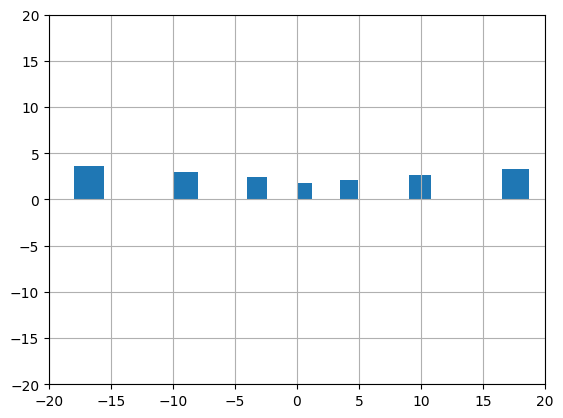

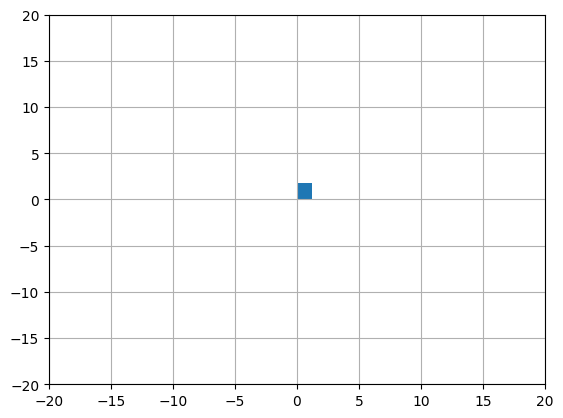

In [70]:
rec = gen_rectangle(2, 3, 5)
recs = [next(rec) for _ in range(10)]
coefs = [0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
recs2 = []
for i in range(10):
    recs2.append(tr_homothety(recs[i], coefs[i]))
visual(recs2)
recs3 = filter(lambda x: flt_point_inside(x, [1, 1]), recs2) # 4 - длина стороны
visual(recs3) # только у этих прямоугольников есть сторона меньше 4

6.	С помощью данных функций реализовать и визуализировать:

* фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

<font color="Crimson">**обязательная часть: 1 пункт<br>3 пункта — сложность 1**

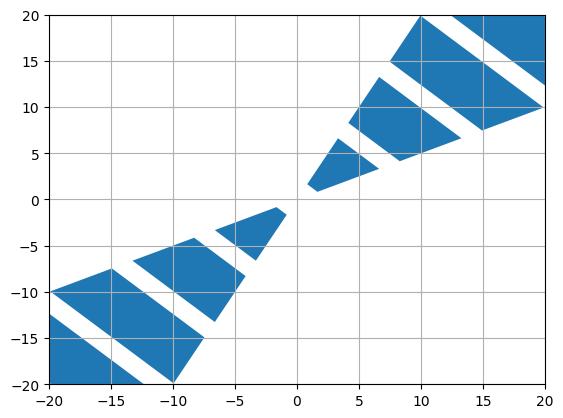

In [73]:
# Фигуры из пункта 4.4 нельзя задать с помощью написанных функций. Создадим их вручную
polygons = [Polygon([[0.083, 0.166], [0.166, 0.083],
                     [0.666, 0.333], [0.333, 0.666]]),
            Polygon([[0.416, 0.833], [0.833, 0.416],
                     [1.333, 0.666], [0.666, 1.333]]),
            Polygon([[0.75, 1.5], [1.5, 0.75],
                     [2, 1], [1, 2]]),
            Polygon([[1.0833, 2.1667], [2.1667, 1.0833],
                     [2.666, 1.333], [1.333, 2.666]])]
polygons = [tr_homothety(a, 9.95) for a in polygons]
polygons2 = [tr_rotate(a, math.pi) for a in polygons]
visual(polygons + polygons2)

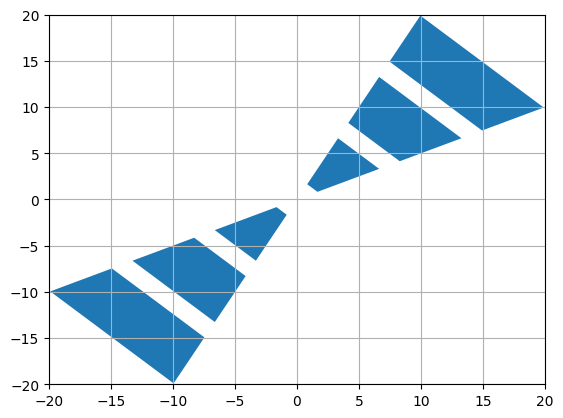

In [74]:
# Продолжение предыдущего кода
area = 70
pol_filter = filter(lambda x: flt_square(x, area), polygons+polygons2)
visual(pol_filter)

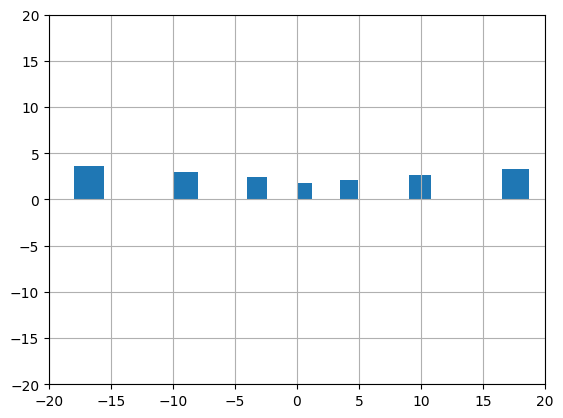

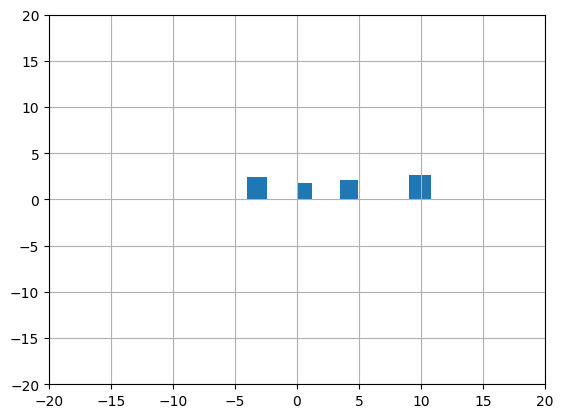

In [82]:
rec = gen_rectangle(2, 3, 5)
recs = [next(rec) for _ in range(15)]
coefs = [0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
recs2 = []
for i in range(15):
    recs2.append(tr_homothety(recs[i], coefs[i]))
visual(recs2)
recs3 = filter(lambda x: flt_short_side(x, 2), recs2) # 2 - длина стороны
visual(recs3) # только у этих прямоугольников есть сторона меньше 2

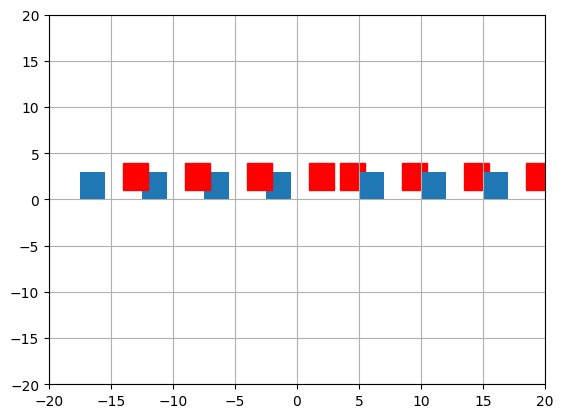

In [85]:
rec = gen_rectangle(2, 3, 2.5)
recs = [next(rec) for _ in range(15)]
for i in range(15):
    if i % 4 == 0 or i % 4 == 1:
        recs[i] = tr_translate(recs[i], 1, 1)
        recs[i].set_color('red')
visual(recs)

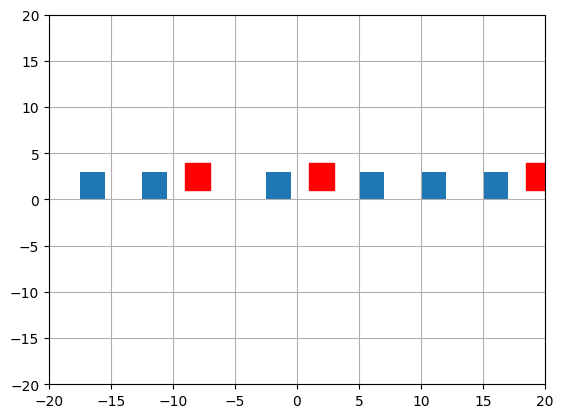

In [99]:
# Продолжение предыдущего кода
def is_poly_in_another(poly1, poly2):
    points = poly1.xy
    return any([flt_point_inside(poly2, a) for a in points])

new_recs = []
i = 0
while i < len(recs):
    if len(list(filter(lambda x: is_poly_in_another(recs[i], x), recs[:i]+recs[i+1:]))) != 0:
        recs.pop(i)
    else:
        new_recs.append(recs[i])
    i += 1
visual(new_recs)

7.	Реализовать декораторы и продемонстрировать корректность их работы:

* фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 5: `@flt_convex_polygon`, `@flt_angle_point`, `@flt_square`, `@flt_short_side`, `@flt_point_inside`, `@flt_polygon_angles_inside`;

* преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: `@tr_translate`, `@tr_rotate`, `@tr_symmetry`, `@tr_homothety`.

<font color="Crimson">**обязательная часть: 1 пункт<br>2 пункта — сложность 1**

In [118]:
def tr_flt_convex_polygon_dec(func):
    def wrapper(*args):
        new = []
        for i in range(len(args)):
            if all([isinstance(a, Polygon) for a in args[i]]):
                new += list(filter(flt_convex_polygon, args[i]))
            else:
                new.append(args[i])
        return func(new)
    return wrapper

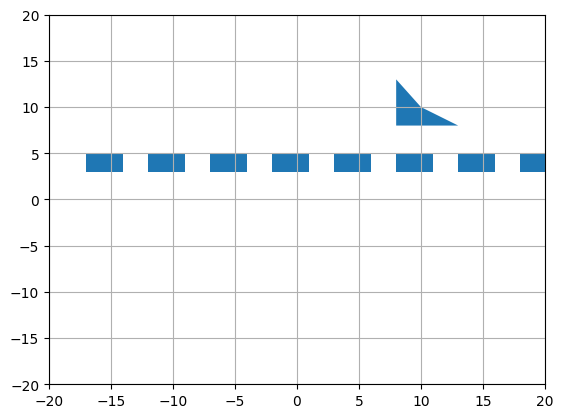

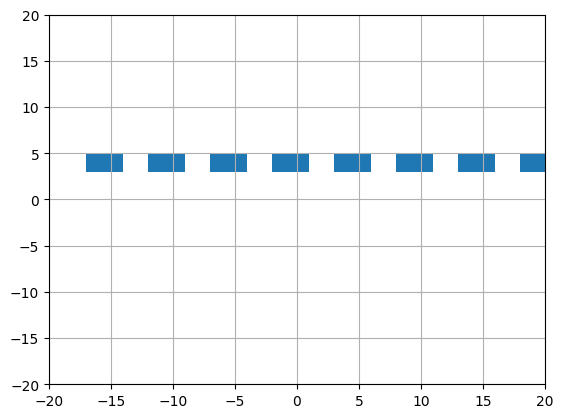

In [119]:
def f(polys):
    return [tr_translate(poly, 3, 3) for poly in polys]

t = gen_rectangle(3, 2, 5)
poly = [next(t) for _ in range(10)] + [Polygon([[5, 5], [10, 5], [7, 7], [5, 10]])]
recs = f(poly)
visual(recs)

@tr_flt_convex_polygon_dec
def f(polys):
    return [tr_translate(poly, 3, 3) for poly in polys]

t = gen_rectangle(3, 2, 5)
poly = [next(t) for _ in range(10)] + [Polygon([[0, 0], [5, 0], [2, 2], [0, 5]])]
recs = f(poly)
visual(recs)

In [120]:
def tr_flt_square_coefs(area):
    def tr_flt_square_dec(func):
        def wrapper(*args):
            new = []
            for i in range(len(args)):
                if all([isinstance(a, Polygon) for a in args[i]]):
                    new += list(filter(lambda x: flt_square(x, area), args[i]))
                else:
                    new.append(args[i])
            return func(new)
        return wrapper
    return tr_flt_square_dec

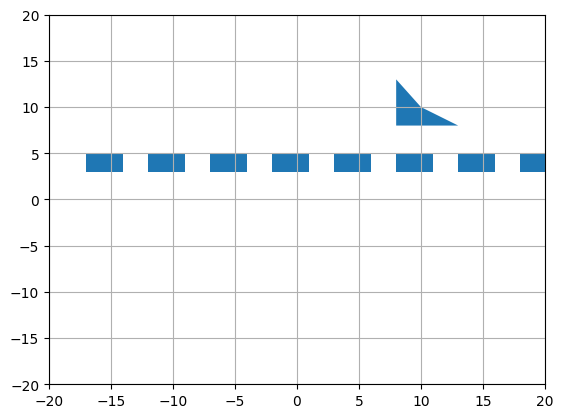

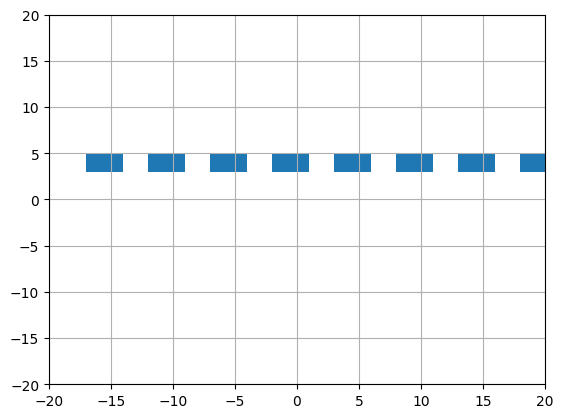

In [122]:
def f(polys):
    return [tr_translate(poly, 3, 3) for poly in polys]

t = gen_rectangle(3, 2, 5)
poly = [next(t) for _ in range(10)] + [Polygon([[5, 5], [10, 5], [7, 7], [5, 10]])]
recs = f(poly)
visual(recs)

@tr_flt_square_coefs(7)
def f(polys):
    return [tr_translate(poly, 3, 3) for poly in polys]

t = gen_rectangle(3, 2, 5)
poly = [next(t) for _ in range(10)] + [Polygon([[0, 0], [5, 0], [2, 2], [0, 5]])]
recs = f(poly)
visual(recs) # площадь фигнюшки больше 7

In [123]:
def tr_flt_short_side_coefs(length):
    def tr_flt_short_side_dec(func):
        def wrapper(*args):
            new = []
            for i in range(len(args)):
                if all([isinstance(a, Polygon) for a in args[i]]):
                    new += list(filter(lambda x: flt_short_side(x, length), args[i]))
                else:
                    new.append(args[i])
            return func(new)
        return wrapper
    return tr_flt_short_side_dec

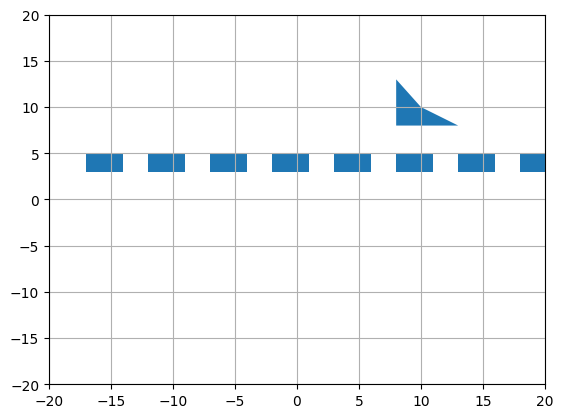

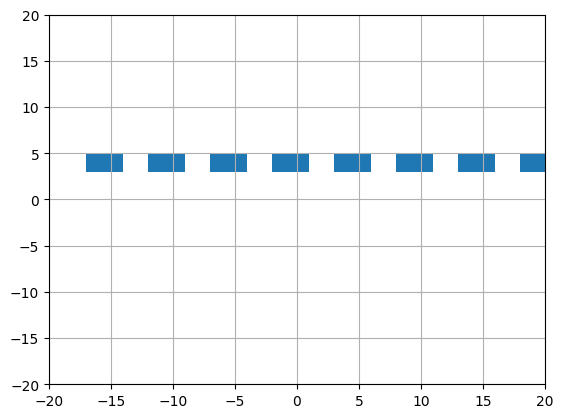

In [125]:
def f(polys):
    return [tr_translate(poly, 3, 3) for poly in polys]

t = gen_rectangle(3, 2, 5)
poly = [next(t) for _ in range(10)] + [Polygon([[5, 5], [10, 5], [7, 7], [5, 10]])]
recs = f(poly)
visual(recs)

@tr_flt_short_side_coefs(3)
def f(polys):
    return [tr_translate(poly, 3, 3) for poly in polys]

t = gen_rectangle(3, 2, 5)
poly = [next(t) for _ in range(10)] + [Polygon([[5, 5], [10, 5], [7, 7], [5, 10]])]
recs = f(poly)
visual(recs) # кратчайшая сторона фигнюшки больше чем 3

In [127]:
def tr_flt_point_inside_coefs(ps):
    def tr_flt_point_inside_dec(func):
        def wrapper(*args):
            new = []
            for i in range(len(args)):
                if all([isinstance(a, Polygon) for a in args[i]]):
                    new += list(filter(lambda x: flt_point_inside(x, ps), args[i]))
                else:
                    new.append(args[i])
            return func(new)
        return wrapper
    return tr_flt_point_inside_dec

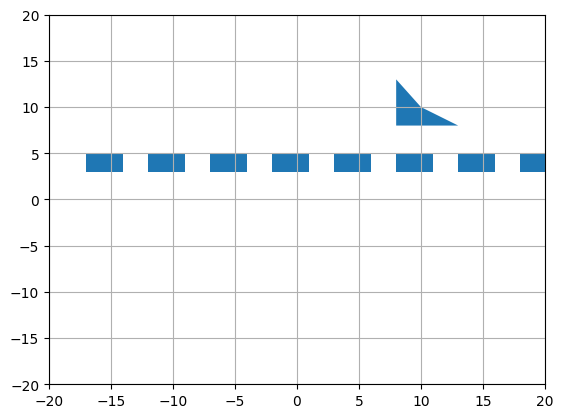

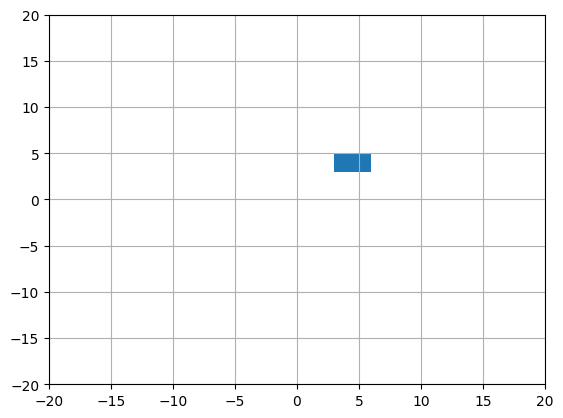

In [129]:
def f(polys):
    return [tr_translate(poly, 3, 3) for poly in polys]

t = gen_rectangle(3, 2, 5)
poly = [next(t) for _ in range(10)] + [Polygon([[5, 5], [10, 5], [7, 7], [5, 10]])]
recs = f(poly)
visual(recs)

@tr_flt_point_inside_coefs([0.5, 0.5])
def f(polys):
    return [tr_translate(poly, 3, 3) for poly in polys]

t = gen_rectangle(3, 2, 5)
poly = [next(t) for _ in range(10)] + [Polygon([[5, 5], [10, 5], [7, 7], [5, 10]])]
recs = f(poly)
visual(recs) # только этот прямоугольник изначально содержал точку (0.5, 0.5)

In [143]:
def tr_translate_coefs(xs=0, ys=0):
    def tr_translate_dec(func):
        @functools.wraps(func)
        def wrapper(*args):
            new = []
            for i in range(len(args)):
                if isinstance(args[i], Polygon):
                    new.append(tr_translate(args[i], xs, ys))
                else:
                    new.append(args[i])
            return func(*new)
        return wrapper
    return tr_translate_dec

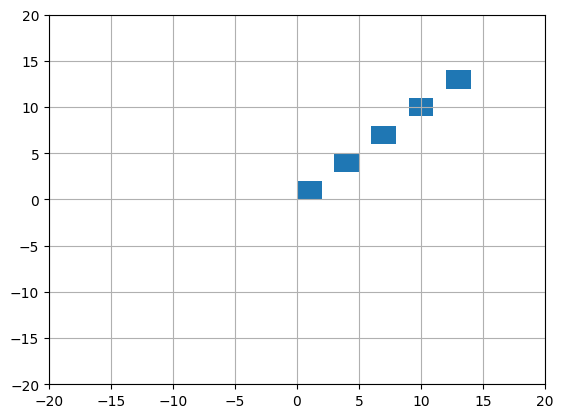

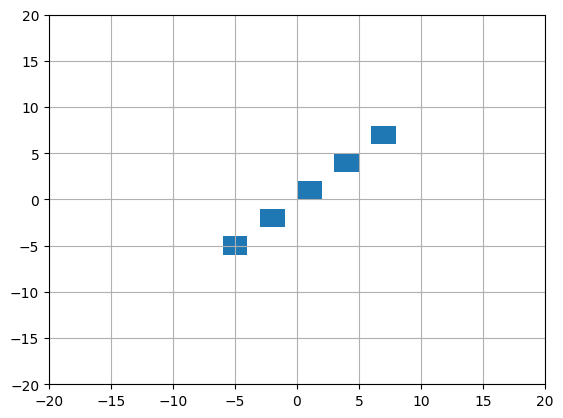

In [ ]:
def f(poly, number):
    return [tr_translate(poly, 3*i, 3*i) for i in range(number)]

poly = Polygon([[0, 0], [0, 2], [2, 2], [2, 0]])
recs = f(poly, 5)
visual(recs)

@tr_translate_coefs(-6, -6)
def f(poly, number):
    return [tr_translate(poly, 3*i, 3*i) for i in range(number)]

poly = Polygon([[0, 0], [0, 2], [2, 2], [2, 0]])
recs = f(poly, 5)
visual(recs) # сместились, так как декоратор сместил полигоны на -5 -5

In [146]:
def tr_rotate_coefs(angle=2):
    def tr_rotate_dec(func):
        @functools.wraps(func)
        def wrapper(*args):
            new = []
            for i in range(len(args)):
                if isinstance(args[i], Polygon):
                    new.append(tr_rotate(args[i], angle))
                else:
                    new.append(args[i])
            return func(*new)
        return wrapper
    return tr_rotate_dec

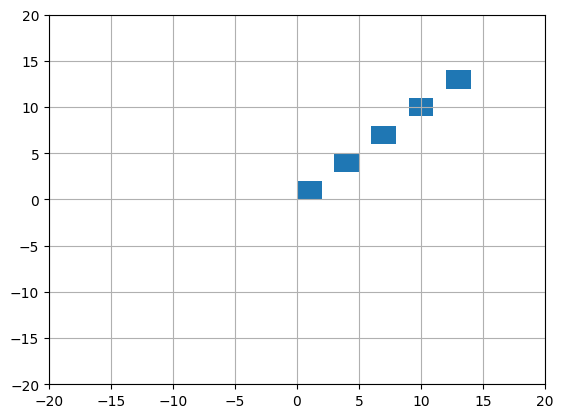

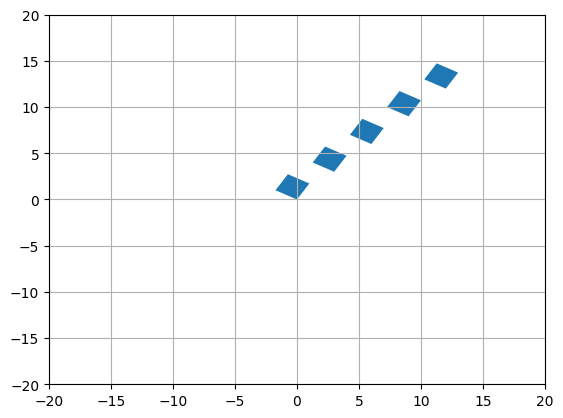

In [147]:
def f(poly, number):
    return [tr_translate(poly, 3*i, 3*i) for i in range(number)]

poly = Polygon([[0, 0], [0, 2], [2, 2], [2, 0]])
recs = f(poly, 5)
visual(recs)

@tr_rotate_coefs(math.pi/3)
def f(poly, number):
    return [tr_translate(poly, 3*i, 3*i) for i in range(number)]

poly = Polygon([[0, 0], [0, 2], [2, 2], [2, 0]])
recs = f(poly, 5)
visual(recs)

In [148]:
def tr_symmetry_coefs(axis='y'):
    def tr_symmetry_dec(func):
        @functools.wraps(func)
        def wrapper(*args):
            new = []
            for i in range(len(args)):
                if isinstance(args[i], Polygon):
                    new.append(tr_symmetry(args[i], axis))
                else:
                    new.append(args[i])
            return func(*new)
        return wrapper
    return tr_symmetry_dec

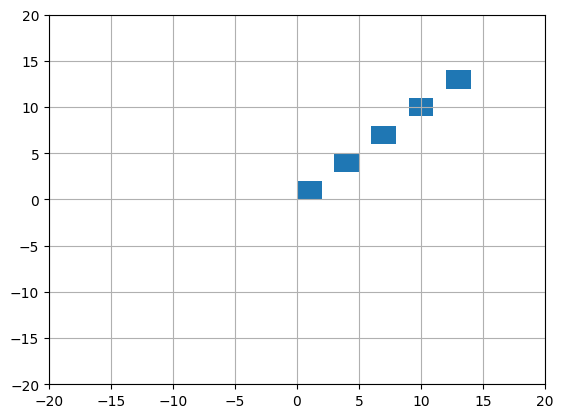

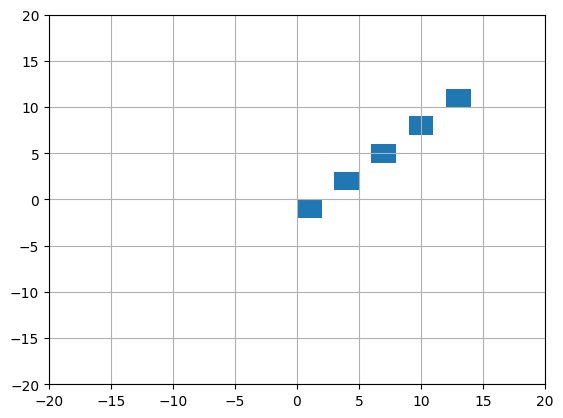

In [149]:
def f(poly, number):
    return [tr_translate(poly, 3*i, 3*i) for i in range(number)]

poly = Polygon([[0, 0], [0, 2], [2, 2], [2, 0]])
recs = f(poly, 5)
visual(recs)

@tr_symmetry_coefs('x')
def f(poly, number):
    return [tr_translate(poly, 3*i, 3*i) for i in range(number)]
poly = Polygon([[0, 0], [0, 2], [2, 2], [2, 0]])
recs = f(poly, 5)
visual(recs)

In [150]:
def tr_homothety_coefs(coef=1):
    def tr_homothety_dec(func):
        @functools.wraps(func)
        def wrapper(*args):
            new = []
            for i in range(len(args)):
                if isinstance(args[i], Polygon):
                    new.append(tr_homothety(args[i], coef))
                else:
                    new.append(args[i])
            return func(*new)
        return wrapper
    return tr_homothety_dec

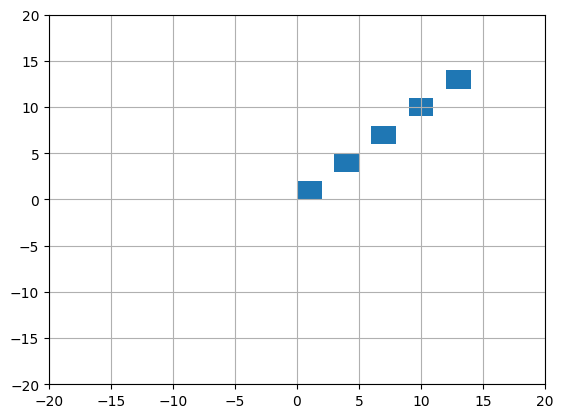

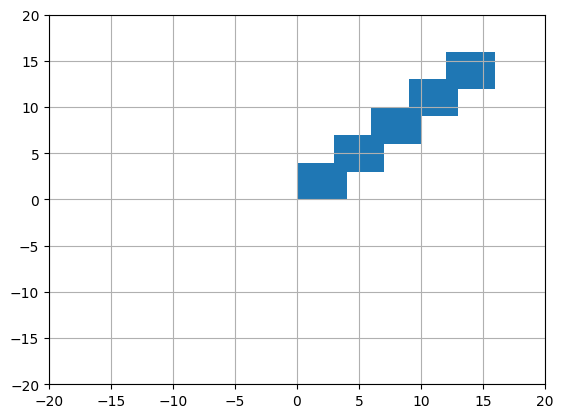

In [152]:
def f(poly, number):
    return [tr_translate(poly, 3*i, 3*i) for i in range(number)]

poly = Polygon([[0, 0], [0, 2], [2, 2], [2, 0]])
recs = f(poly, 5)
visual(recs)

@tr_homothety_coefs(2)
def f(poly, number):
    return [tr_translate(poly, 3*i, 3*i) for i in range(number)]
poly = Polygon([[0, 0], [0, 2], [2, 2], [2, 0]])
recs = f(poly, 5)
visual(recs)

8. Реализовать функции и продемонстрировать их корректность:

* поиск угла, самого близкого к началу координат (`agr_origin_nearest`);

* поиск самого длинной стороны многоугольника (`agr_max_side`);

* поиск самой маленькой площади многоугольника (`agr_min_area`);

* расчет суммарного периметра (`agr_perimeter`);

* расчет суммарной площади (`agr_area`);

которые можно применить к последовательности полигонов с помощью функции `functools.reduce`.

<font color="Crimson">**3 пункта — сложность 1<br>5 пунктов — сложность 2**


In [155]:
def area(polygon):
    s = 0
    points = polygon.xy
    n = len(points)
    for i in range(len(points)-1):
        s += (points[i][0]*points[i+1][1])
    s += points[n-1][0]*points[0][1]
    for i in range(len(points)-1):
        s -= (points[i+1][0]*points[i][1])
    s -= points[0][0] * points[n-1][1]
    s = abs(s)/2
    return s

def agr_area(t, polygon):
    return t + area(polygon)

In [172]:
x = gen_rectangle(4, 3, 0)
recs = [0] + [next(x) for _ in range(10)]
functools.reduce(agr_area, recs)

120.0

In [ ]:
def origin_nearest(polygon):
    p = polygon.xy
    return min(p, key=lambda a: np.sqrt(a[0]*a[0] + a[1]*a[1]))

def agr_origin_nearest(polygon1, polygon2):
    m1 = origin_nearest(polygon1)
    m2 = origin_nearest(polygon2)
    if m1 <= m2:
        return polygon1
    else:
        return polygon2

In [ ]:
def max_side(polygon):
    p = polygon.xy
    n = len(p)
    dists = []
    for i in range(n-1):
        dists.append(math.sqrt(pow(p[i][0]-p[i+1][0], 2) + pow(p[i][1]-p[i+1][1], 2)))
    dists.append(math.sqrt(pow(p[n-1][0]-p[0][0], 2) + pow(p[n-1][1]-p[0][1], 2)))
    return max(dists)

def agr_max_side(polygon1, polygon2):
    m1 = max_side(polygon1)
    m2 = max_side(polygon2)
    if m1 >= m2:
        return polygon1
    else:
        return polygon2

In [ ]:
def min_area(polygon):
    s = 0
    points = polygon.xy
    for i in range(len(points)-1):
        s += (points[i][0]*points[i+1][1])
    s += points[n-1][0]*points[0][1]
    for i in range(len(points)-1):
        s -= (points[i+1][0]*points[i][1])
    s -= points[0][0] * points[n-1][1]
    s = abs(s)/2
    return s

def agr_min_area(polygon1, polygon2):
    m1 = min_area(polygon1)
    m2 = min_area(polygon2)
    if m1 <= m2:
        return polygon1
    else:
        return polygon2

In [170]:
def dist(p1, p2):
    return math.sqrt(pow(p1[0]-p2[0], 2) + pow(p1[1]-p2[1], 2))
def perimeter(polygon):
    res = 0
    points = polygon.xy
    for i in range(len(points)-1):
        res += dist(points[i], points[i+1])
    res += dist(points[0], points[-1])
    return res
def agr_perimeter(t, polygon):
    return t + perimeter(polygon)

In [171]:
x = gen_rectangle(4, 3, 0)
recs = [0] + [next(x) for _ in range(10)]
functools.reduce(agr_perimeter, recs)

140.0

9. Реализовать функции и продемонстрировать пример их работы (если возможно, с визуализацией):

* склейки полигонов в одну последовательность полигонов из нескольких последовательностей полигонов `zip_polygons(iterator1, iterator2, [iterator3, ...])`. Пример:  

    ```zip_polygons([((1, 1), (2, 2), (3, 1)), ((11, 11), (12, 12), (13, 11))], [((1, -1), (2, -2), (3, -1)), ((11, -11), (12, -12), (13, -11))])``` →

    ```[((1, 1), (2, 2), (3, 1), (1, -1), (2, -2), (3, -1)), ((11, 11), (12, 12), (13, 11), (11, -11), (12, -12), (13, -11))]```.

Альтернативный пример (визуализация) на рис. 4.

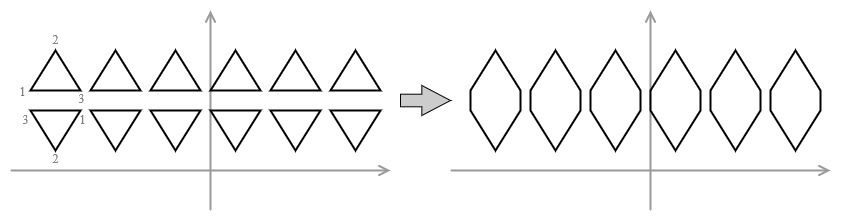

Рисунок 4 — Альтернативный пример склейки полигонов

* генерации `count_2D()` параметры: `(start1, start2)`, `[(step1, step2)]`, результаты: `(start1, start2)`, `(start1+step1, start2+step2)`, `(start1+2*step1, start2+2*step2)`;

* склейки полигонов в одну последовательность полигонов из нескольких последовательностей `zip_tuple(iterator1, iterator2)`. Пример:

    ```zip_tuple([(1,1),  (2,2), (3,3), (4,4)], [(2,2), (3,3), (4,4), (5,5)], [(3,3), (4,4), (5,5), (6,6)])``` →

    ```((1,1),  (2,2), (3,3)), ((2,2), (3,3) (4,4)), ((3,3), (4,4), (5,5)), ((5,5), (6,6), (7,7))```.

<font color="Crimson">**3 пункта — сложность 1**